In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("Wholesale customers data.csv")

In [4]:
df.shape

(440, 8)

In [5]:
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [6]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [7]:
df.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [8]:
df_ohe = pd.get_dummies(df)

In [9]:
df_ohe.shape

(440, 8)

Training and Testing split

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X= df_ohe

In [12]:
X_train,X_test = train_test_split(X,test_size=0.3,random_state =7)

In [13]:
X_train.shape,X_test.shape

((308, 8), (132, 8))

Perform K means Clustering

In [14]:
from sklearn.cluster import KMeans

In [59]:
km = KMeans(n_clusters=3,random_state=7) # Create object of model

In [60]:
# Train the model using fit
km.fit(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=7)

In [61]:
km.cluster_centers_

array([[1.33207547e+00, 2.51320755e+00, 8.09695094e+03, 4.97251321e+03,
        6.77085660e+03, 2.59088679e+03, 2.49478868e+03, 1.23895094e+03],
       [1.05882353e+00, 2.55882353e+00, 3.95591471e+04, 5.58008824e+03,
        6.11585294e+03, 7.52655882e+03, 8.19823529e+02, 2.34700000e+03],
       [1.88888889e+00, 2.55555556e+00, 2.33467778e+04, 4.12918889e+04,
        4.30628889e+04, 7.71677778e+03, 1.92505556e+04, 9.99066667e+03]])

In [62]:
# Get the predictions from the model
Clust_nos = km.predict(X_test)

In [63]:
Clust_nos




array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 2, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int32)

In [64]:
len(Clust_nos),X_test.shape

(132, (132, 8))

In [65]:
from sklearn.metrics import silhouette_score

In [66]:
silhouette_score(X_test,Clust_nos,random_state=7)

0.4351253384510246

In [67]:
#try various values of K from  2 to 11
l1=[]
for i in range(2,11):
  km = KMeans(n_clusters=i,random_state=7)
  km.fit(X_train)
  Clust_nos = km.predict(X_test)
  res= silhouette_score(X_test,Clust_nos,random_state=7)
  l1.append(res)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [68]:
l1

[0.43116036523140805,
 0.4351253384510246,
 0.39259771998145176,
 0.4031337777441531,
 0.40103112131847785,
 0.40142455713104863,
 0.35813724006435854,
 0.3559558185815709,
 0.28668594198516817]

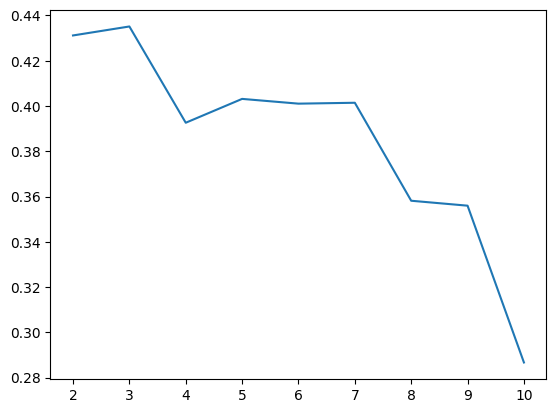

In [69]:
from matplotlib import pyplot as plt
plt.plot(range(2,11),l1)

In [70]:
# Try various values of K from 2 to 10
inertia_list = []
sc_list=[]
for k in range(2,11):
    km = KMeans(k,random_state=7)
    km.fit(X_train)
    cluster_nos = km.predict(X_test)
    inertia_list.append(km.inertia_)
    sc_list.append(silhouette_score(X_test, cluster_nos))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [71]:
inertia_list

[84591296045.64545,
 61988695402.30534,
 48783264310.272545,
 39862648992.33348,
 34385687957.854126,
 29488647397.928593,
 25725674148.301308,
 23904543622.523384,
 21688299996.772568]

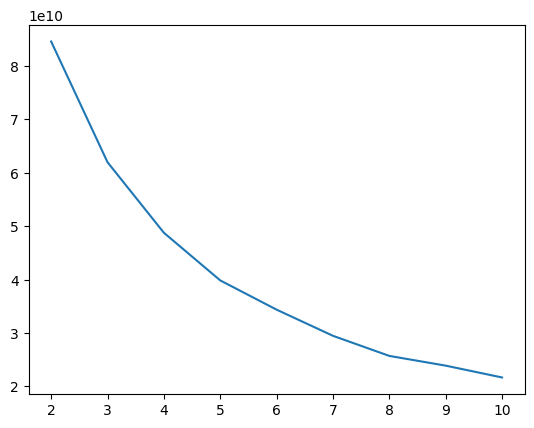

In [72]:
from matplotlib import pyplot as plt
plt.plot(range(2,11), inertia_list)

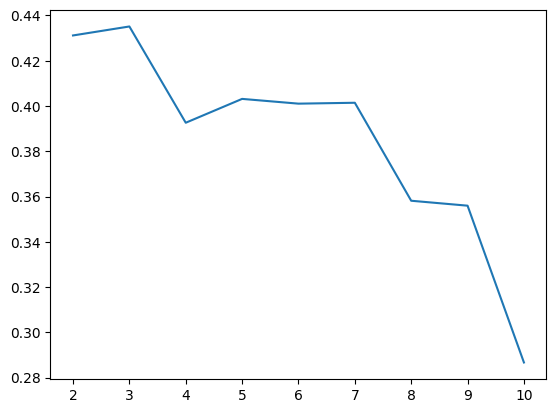

In [73]:
from matplotlib import pyplot as plt
plt.plot(range(2,11), sc_list)

# K=3 based on maximum silhouette score